In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def margin(x):
    x = pd.DataFrame(x, index=["D", "R"]).T
    x = x.D -x.R
    return x

In [4]:
house_pv = {
#     2020: [50.8, 47.7],
    2018: [53.4,44.8],
    2016: [48,49.1],
    2014: [45.5, 51.2],
    2012: [48.8, 47.7],
    2010: [44.9, 51.7],
    2008: [53.2, 42.6],
    2006: [52.3, 44.3],
    2004: [46.8, 49.4],
    2002: [45.2, 50.0],
    2000: [47.1, 47.6],
    1998: [47.3, 48.4],
    1996: [48.22, 48.15],
    1994: [44.7, 51.5],
    1992: [50.1, 45.1],
    1990: [52.1, 44.3],
    1988: [53.3, 45.6]
}
house_pv = margin(house_pv)

In [5]:
pres_pv = {
#     2020: [51.3, 46.9],
    2016: [48.2, 46.1],
    2012: [51.1, 47.2],
    2008: [52.9, 45.7],
    2004: [48.3, 50.7],
    2000: [48.4, 47.9],
    1996: [49.2, 40.7],
    1992: [43.0, 37.5],
    1988: [45.7, 53.4],
}
pres_pv = margin(pres_pv)

In [6]:
pres_baseline = np.array(pres_pv)

Text(0.5, 0, 'Standard deviation across elections [%]')

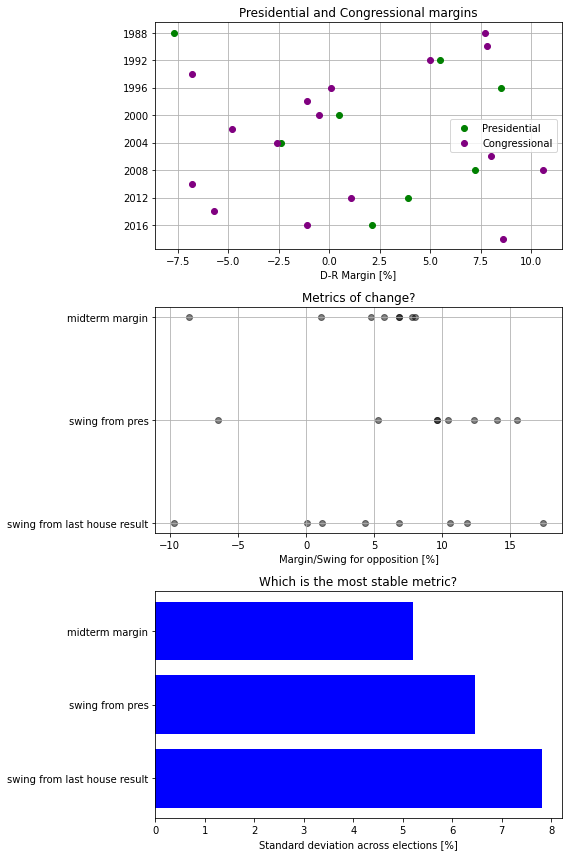

In [8]:
_, axs = plt.subplots(3, 1, figsize=(8, 12), tight_layout=True, facecolor="white")
axs[0].set_title("Presidential and Congressional margins")
axs[0].plot(pres_pv, pres_pv.index, linestyle=" ", marker="o", label="Presidential", color="green")
axs[0].plot(house_pv, house_pv.index, linestyle=" ", marker="o", label="Congressional", color="purple")
axs[0].set_yticks(pres_pv.index)
axs[0].grid()
axs[0].set_xlabel("D-R Margin [%]")
axs[0].invert_yaxis()
axs[0].legend()

axs[1].set_title("Metrics of change?")
labels = []
stds = []
for i, (name, stat) in enumerate(
    reversed(
        [
            ("midterm margin", house_pv[pres_pv.index + 2] * -np.sign(pres_baseline)),
            (
                "swing from pres",
                (house_pv[pres_pv.index + 2] - pres_baseline) * -np.sign(pres_baseline),
            ),
            (
                "swing from last house result",
                (house_pv[pres_pv.index + 2] - np.array(house_pv[pres_pv.index]))
                * -np.sign(pres_baseline),
            ),
        ]
    )
):
    labels.append(f"{name}")
    stds.append(np.std(stat))
    axs[1].scatter(stat, [i] * len(pres_pv), alpha=0.5, color="black")
axs[1].set_yticks(list(range(len(labels))))
axs[1].set_yticklabels(labels)
axs[1].set_xlabel("Margin/Swing for opposition [%]")
axs[1].grid()

axs[2].set_title("Which is the most stable metric?")
axs[2].barh(range(len(stds)), stds, color="blue")
axs[2].set_yticks(range(len(stds)))
axs[2].set_yticklabels(labels)
axs[2].set_xlabel("Standard deviation across elections [%]")